In [4]:
import csv
f = open('./Fish.csv', 'r')
data = csv.reader(f)

header = next(data)

#도미
bream_weight = []
bream_length = []
#빙어
smelt_weight = []
smelt_length = []

for row in data:
    if row[0] == "Bream":
        bream_weight.append(float(row[1]))
        bream_length.append(float(row[3]))
        
    if row[0] == "Smelt":
        smelt_weight.append(float(row[1]))
        smelt_length.append(float(row[3]))
        
f.close()

fish_weight =  bream_weight + smelt_weight
fish_length =  bream_length + smelt_length



In [18]:
fish_data = [[l,w] for l, w in zip( fish_length, fish_weight)] #입력데이터 준비
#도미: 1, 빙어 : 0

fish_target = [1] * 35 + [0] * 14 #label 준비

print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [19]:
#학습 데이터셋
train_input  = fish_data[0:35] #슬라이싱
train_target = fish_target[0:35]

#시험 데이터셋
test_input = fish_data[35:] #35부터 마지막 인덱스 까지
test_target = fish_target[35:]

In [20]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [21]:
kn.fit(train_input, train_target)  #모델을 학습 데이터에 피팅(Fitting) 시킨다.

KNeighborsClassifier()

In [22]:
kn.score(test_input, test_target)

# 정확도 (Accuracy) = 맞춘 문제의 개수 / 전체 문제의 개수

0.0

In [25]:
import numpy as np

input_arr = np.array(fish_data)     #49마리의 생선
target_arr = np.array(fish_target) #n-dimensional array - > ndarray

print(input_arr.shape) #모양 --> (샘플의 개수, 특성의 개수)

# print(type(input_arr))

(49, 2)


In [50]:
#0~48(49마리의 생선)
np.random.seed(42)
index = np.arange(0, 49) #시작숫자, 마지막숫자 --> 처음부터 할 시 시작숫자는 생략가능
print('섞기 전: ' , index)

np.random.shuffle(index) # 전달되는 배열을 무작위로 섞는 함수
print('섞은 후: ' , index)

섞기 전:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
섞은 후:  [13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [51]:
#인덱스
#슬라이싱 --> arr[0:5]
#배열 인덱싱(Array Indexing)

#학습 데이터셋의 샘플 개수 = 35
train_input = input_arr[index[0:35]] # 0이상 35미만
train_target = target_arr[index[0:35]]

#시험 데이터셋의 샘플 개수 = 14
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

print(train_input[0])
print(input_arr[13])

[ 32. 340.]
[ 32. 340.]


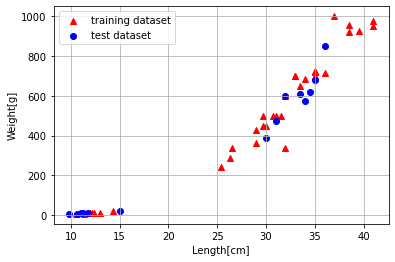

In [60]:
# scatter plot(산점도)

import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1], label = 'training dataset', c='r', marker='^')
plt.scatter(test_input[:,0], test_input[:,1], label = 'test dataset', c ='b' )
plt.xlabel('Length[cm]')
plt.ylabel('Weight[g]')
plt.grid(True)
plt.legend() # 전설, 범례
plt.show()

In [62]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [63]:
kn.score(test_input, test_target)

1.0

In [64]:
kn.predict(test_input) #predict 예측하다

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [65]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])